#**HEART FAILURE PREDICTION USING MACHINE LEARNING ALGORITHMS:**

**by**

#**E7322002-DHINESH D**

#**E7322008-MARZUK AHAMED**


#DATASET:
https://www.kaggle.com/code/midouazerty/heart-failure-prediction/data?select=heart_failure_clinical_records_dataset.csv

**Importing important packages:**

In [ ]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

#default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

#Columns Description:
1.anaemia:Decrease of red blood cells or hemoglobin (boolean)

2.creatinine_phosphokinase:Level of the CPK enzyme in the blood (mcg/L)


3.diabetes:If the patient has diabetes (boolean)

4.ejection_fraction:Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction

5.high_blood_pressure:blood hypertension

6.platelets:are a component of blood whose function (along with the coagulation factors)

7.serum_creatinine:Serum creatinine is widely interpreted as a measure only of renal function


8.serum_sodium: to see how much sodium is in your blood it is particularly important for nerve and muscle function.



**Loading the dataset:**

In [ ]:
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Statistical description of data:**

In [ ]:
#Q1:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**The data has no null values.**

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
df.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   
5  90.0        1                        47         0                 40   
6  75.0        1                       246         0                 15   
7  60.0        1                       315         1                 60   
8  65.0        0                       157         0                 65   
9  80.0        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   
5                    1  204000.00               2.1           132    1   
6                    0  127000.00               1.2           137    1   
7                    0  454000.00               1.1           131    1   
8                    0  263358.03               1.5           138    0   
9                    1  388000.00               9.4           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

In [ ]:
df['DEATH_EVENT'].unique()

array([1, 0])

In [ ]:
df['DEATH_EVENT'].nunique()

2

**Since there are only 2 categories in the class label column this comes under the binary classification**

In [ ]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
df.groupby('DEATH_EVENT').count()

age  anaemia  creatinine_phosphokinase  diabetes  \
DEATH_EVENT                                                     
0            203      203                       203       203   
1             96       96                        96        96   

             ejection_fraction  high_blood_pressure  platelets  \
DEATH_EVENT                                                      
0                          203                  203        203   
1                           96                   96         96   

             serum_creatinine  serum_sodium  sex  smoking  time  
DEATH_EVENT                                                      
0                         203           203  203      203   203  
1                          96            96   96       96    96

**The number of entries for both category are not equal and oversampling is to be done.**

In [ ]:
df.corr()

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
DEATH_EVENT              -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
DEATH_EVENT               -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  DEATH_EVENT  
age                       0.018668 -0.224068     0.253729  
anaemia                  -0.107290 -0.141414     0.066270  
creatinine_phosphokinase  0.002421 -0.009346     0.062728  
diabetes                 -0.147173  0.033726    -0.001943  
ejection_fraction        -0.067315  0.041729    -0.268603  
high_blood_pressure      -0.055711 -0.196439     0.079351  
platelets                 0.028234  0.010514    -0.049139  
serum_creatinine         -0.027414 -0.149315     0.294278  
serum_sodium              0.004813  0.087640    -0.195204  
sex                       0.445892 -0.015608    -0.004316  
smoking                   1.000000 -0.022839    -0.012623  
time                     -0.022839  1.000000  

**Correlation:**

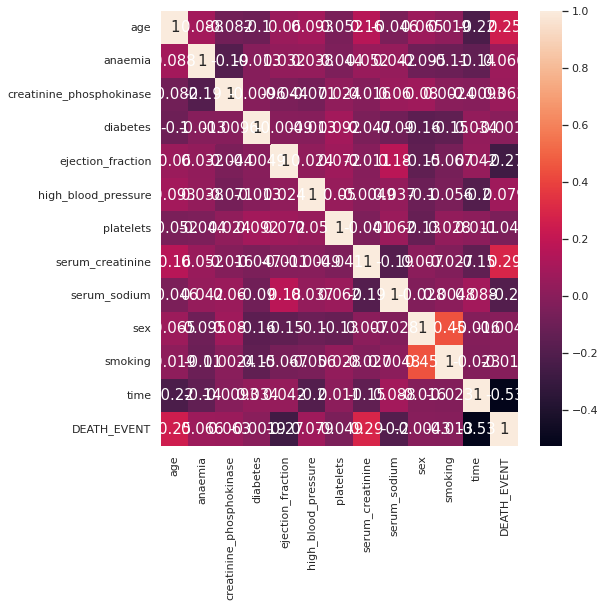

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [ ]:
a=df.corr()
a

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
DEATH_EVENT              -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
DEATH_EVENT               -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  DEATH_EVENT  
age                       0.018668 -0.224068     0.253729  
anaemia                  -0.107290 -0.141414     0.066270  
creatinine_phosphokinase  0.002421 -0.009346     0.062728  
diabetes                 -0.147173  0.033726    -0.001943  
ejection_fraction        -0.067315  0.041729    -0.268603  
high_blood_pressure      -0.055711 -0.196439     0.079351  
platelets                 0.028234  0.010514    -0.049139  
serum_creatinine         -0.027414 -0.149315     0.294278  
serum_sodium              0.004813  0.087640    -0.195204  
sex                       0.445892 -0.015608    -0.004316  
smoking                   1.000000 -0.022839    -0.012623  
time                     -0.022839  1.000000  

In [ ]:
#!pip install plotly==4.1.1

**Interactive correlation plot:**

In [ ]:
import plotly.graph_objects as go
data=go.Heatmap(x=a.columns,y=a.index,z=a.values)
data=[data]
fig=go.Figure(data)
fig.show()

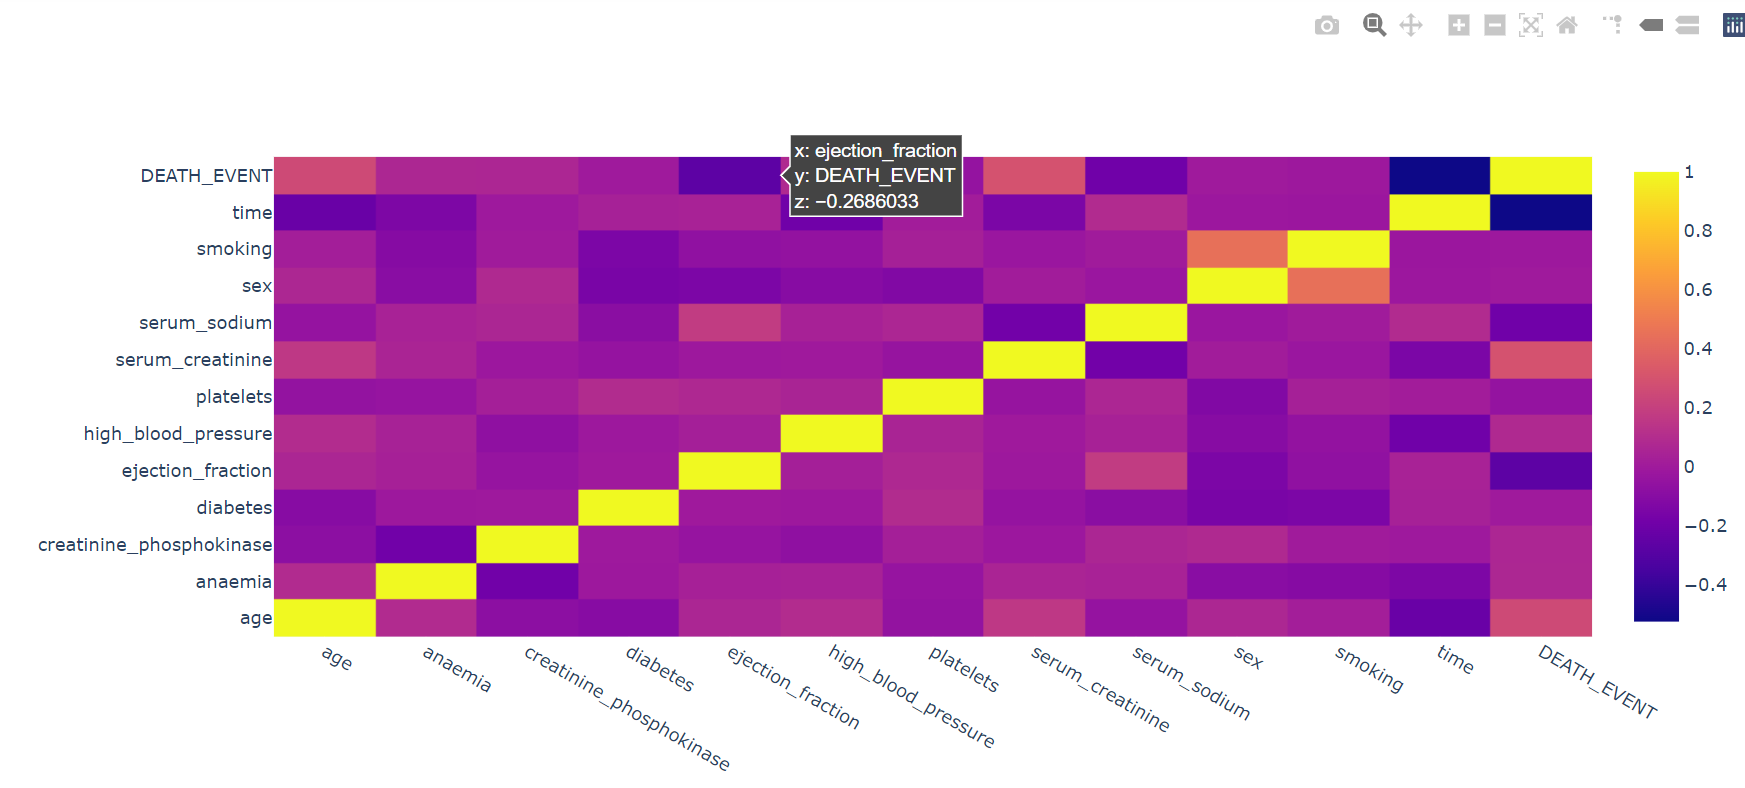

**Feature selection:**

<ipython-input-16-8da848d7d4aa>:12: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[0.09577829 0.02432233 0.07538688 0.03029388 0.13064064 0.0237257
 0.06866993 0.12425516 0.08551216 0.02615767 0.02961571 0.28564163]


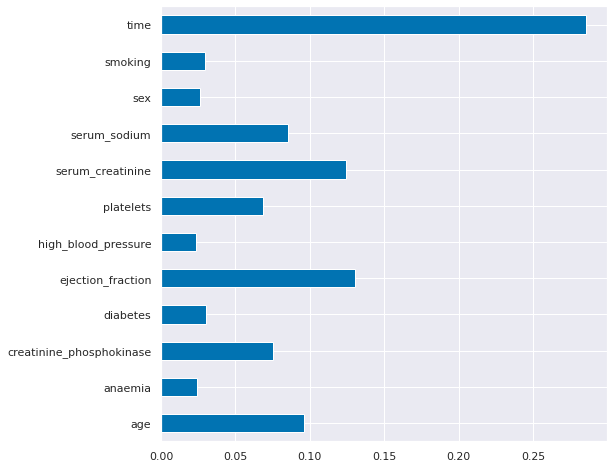

In [ ]:
#feature selection
import pandas as pd
import numpy as np
data = df.copy()
X = data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']] #independent columns
y = data[['DEATH_EVENT']]   
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')#
feat_importances.plot(kind='barh')
plt.show()

**Feature scores:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']] #independent columns
y = data[['DEATH_EVENT']]   
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
a=featureScores.nlargest(10,'Score')
#print(featureScores.nlargest(10,'Score'))  #print 10 best features
a

Specs         Score
6                  platelets  26135.771990
11                      time   3826.892661
2   creatinine_phosphokinase   1897.314839
4          ejection_fraction     79.072541
0                        age     44.619455
7           serum_creatinine     19.814118
8               serum_sodium      1.618175
5        high_blood_pressure      1.221539
1                    anaemia      0.746593
10                   smoking      0.032347

In [ ]:
b=a['Specs'].values
b

array(['platelets', 'time', 'creatinine_phosphokinase',
       'ejection_fraction', 'age', 'serum_creatinine', 'serum_sodium',
       'high_blood_pressure', 'anaemia', 'smoking'], dtype=object)

In [ ]:
train=df.copy()

**DATA VISUALIZTION**

**Type of data:**

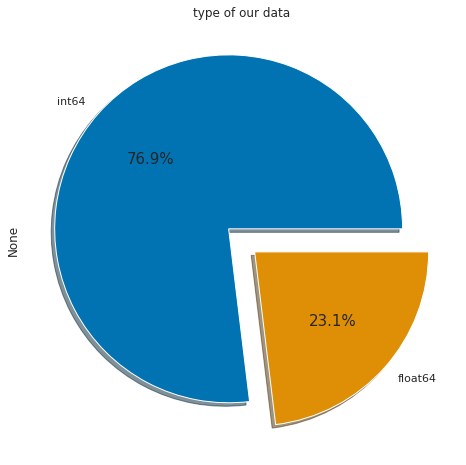

In [ ]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('type of our data');

**Inference:**int64 comprises 76.9%

**Histogram:**

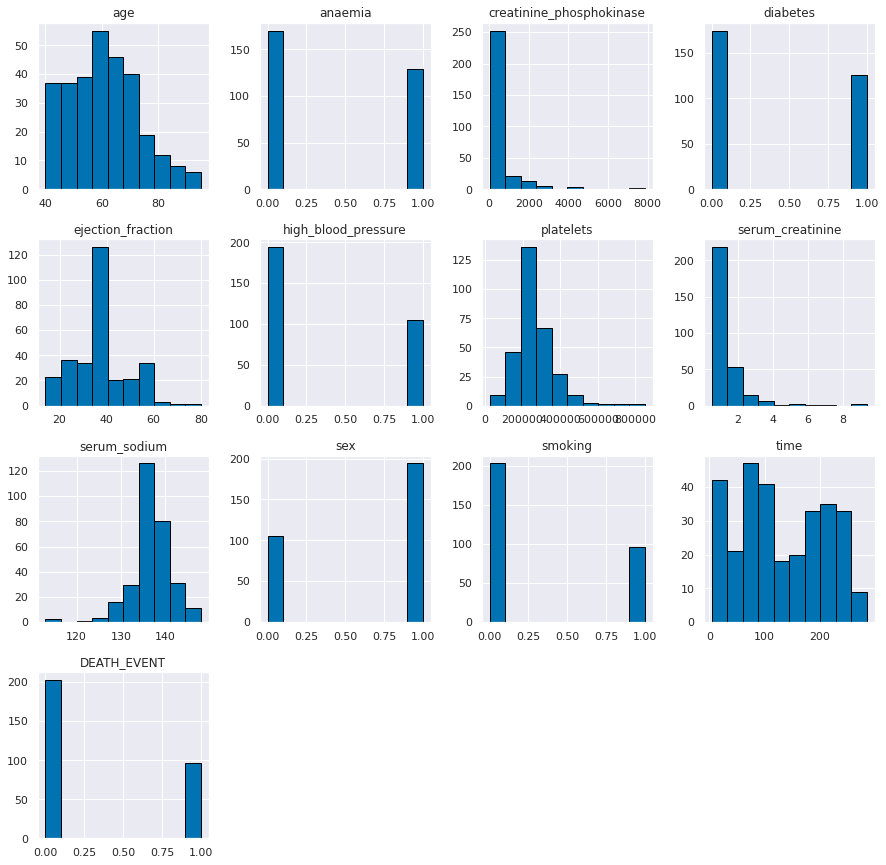

In [ ]:
train.hist(figsize=(15,15),edgecolor='black');

**Death events:**

Text(0.5, 1.0, 'the % of deaths')

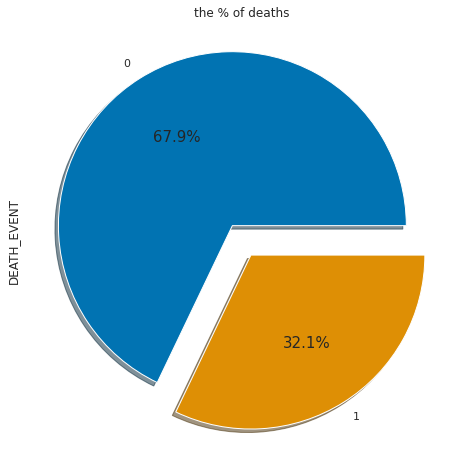

In [ ]:
train.DEATH_EVENT.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('the % of deaths')

**Inference:**

67.9% dead

32.1% alive

**Age Distribution:**

Text(0.5, 1.0, 'the ages of our person')

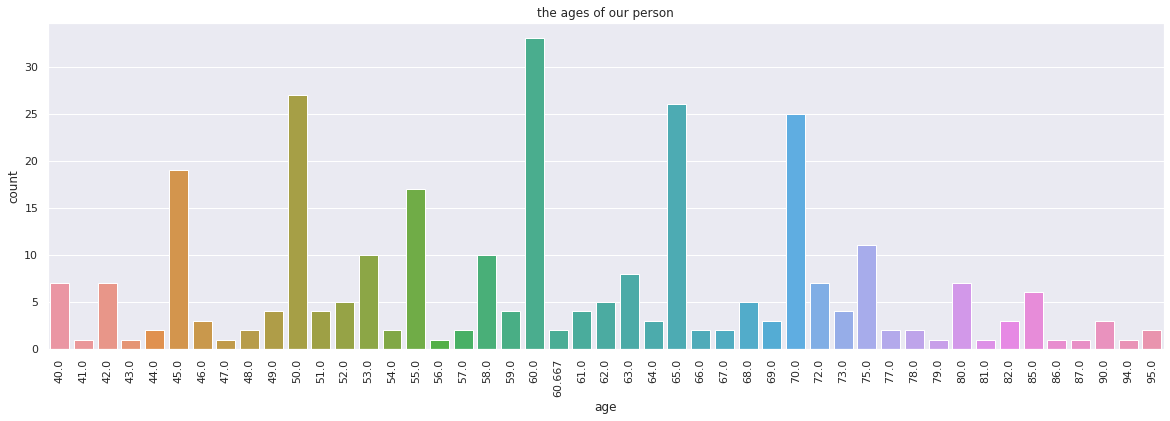

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='age',data=train)
plt.xticks(rotation=90)
plt.title('the ages of our person')

**People of age 45,50,60,65 & 70 have more count in the data.**

**Age Distribution Interactive plot:**

In [ ]:
# Distribution of Age


fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='Distribution of Age',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'presentation'
)

fig.show()

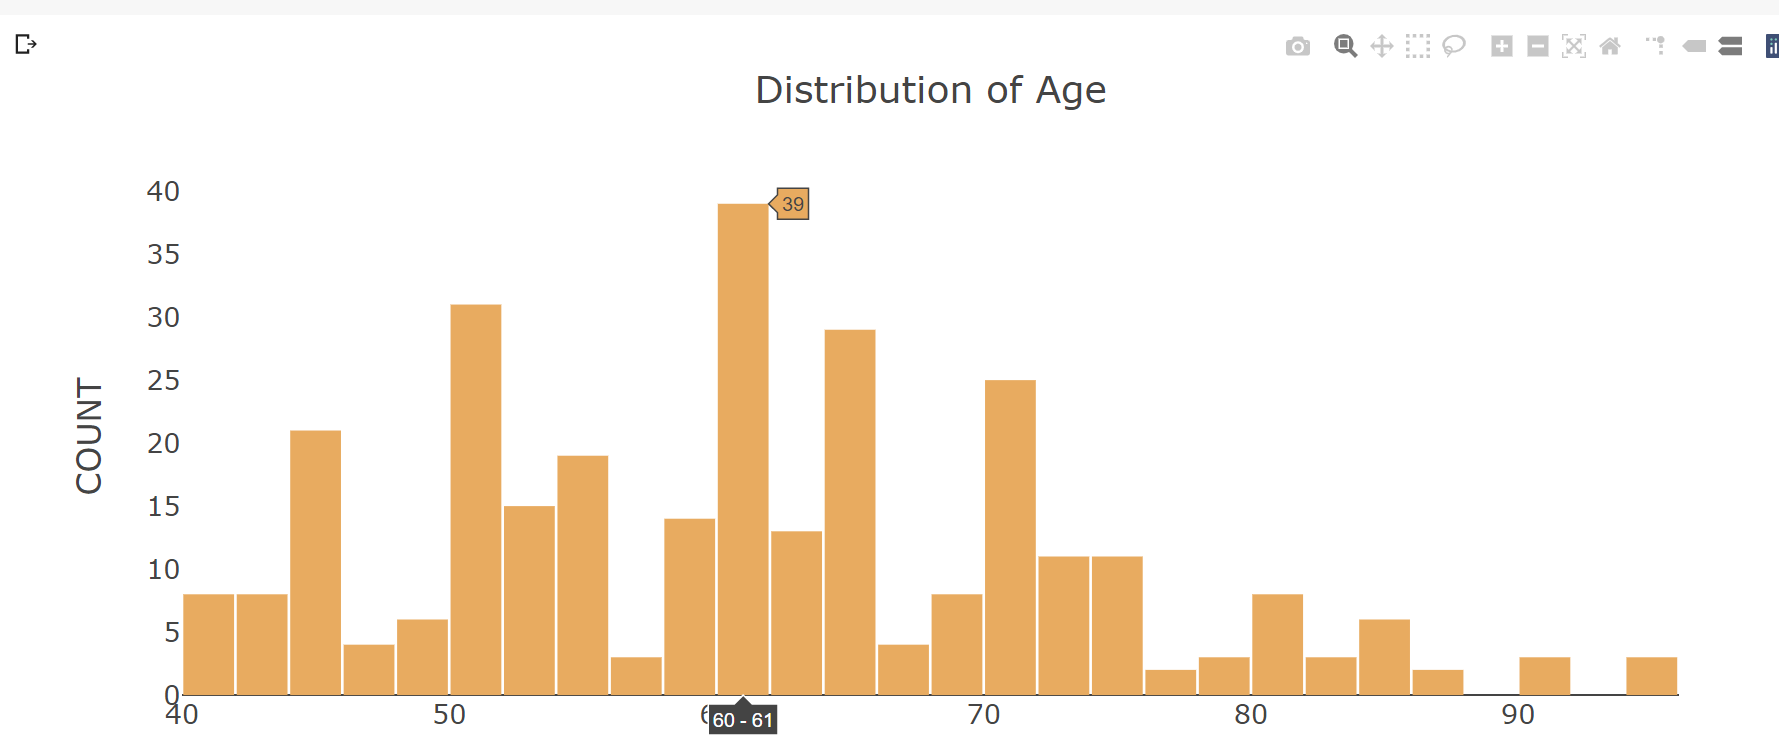

#**Distribution of AGE Vs DEATH_EVENT:**

In [ ]:
fig = px.histogram(train, x="age", color="DEATH_EVENT", marginal="violin", hover_data=train.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly",
                   
                   
                  )
fig.show()


Age 58-62 has the highest death event '0'(dead) of count 38

Age 58-62 has the highest death event '1'(alive) of count 20

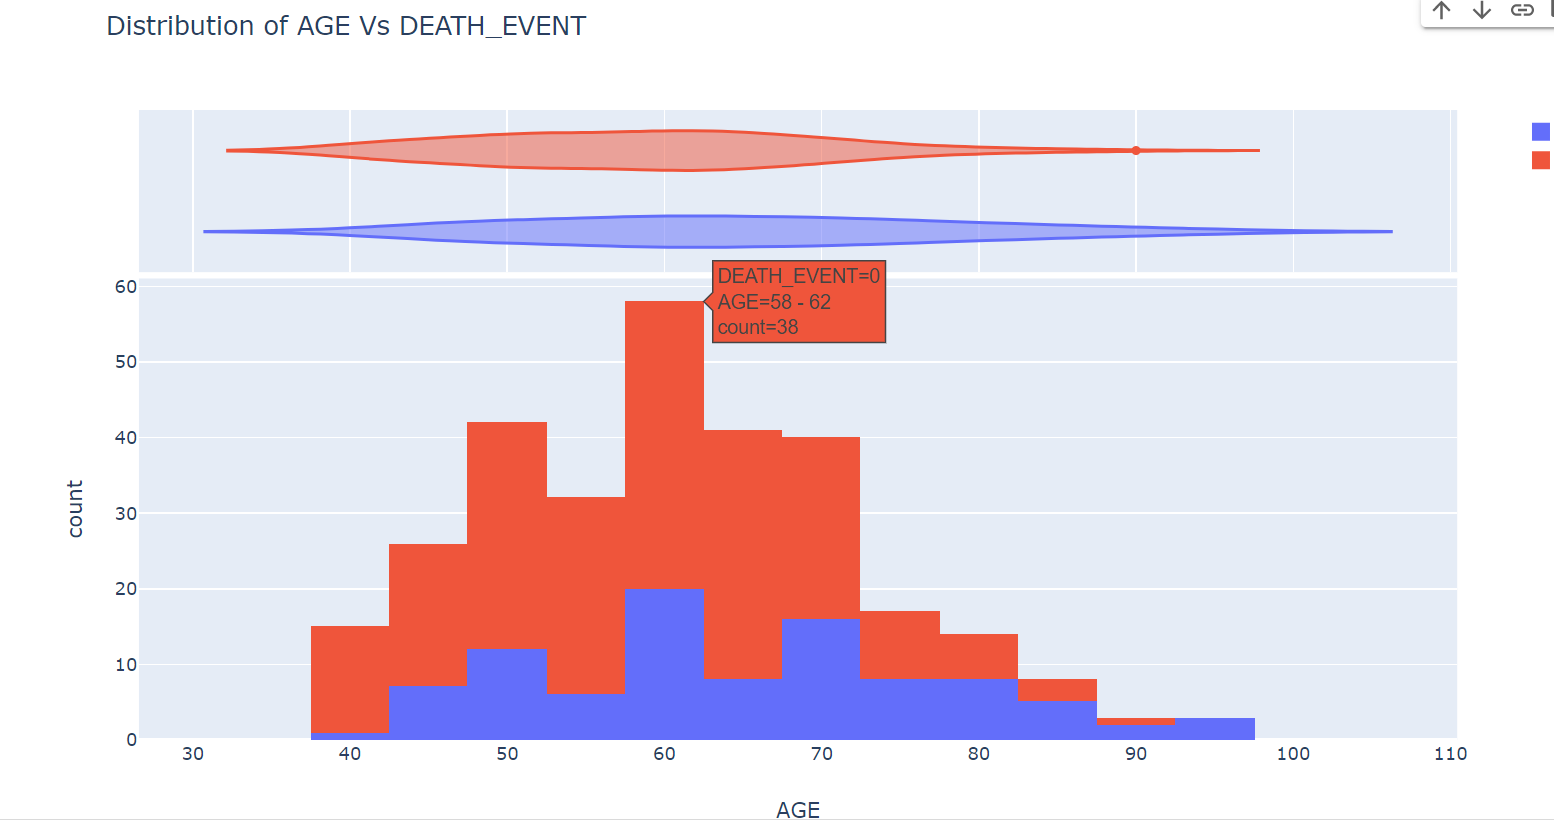


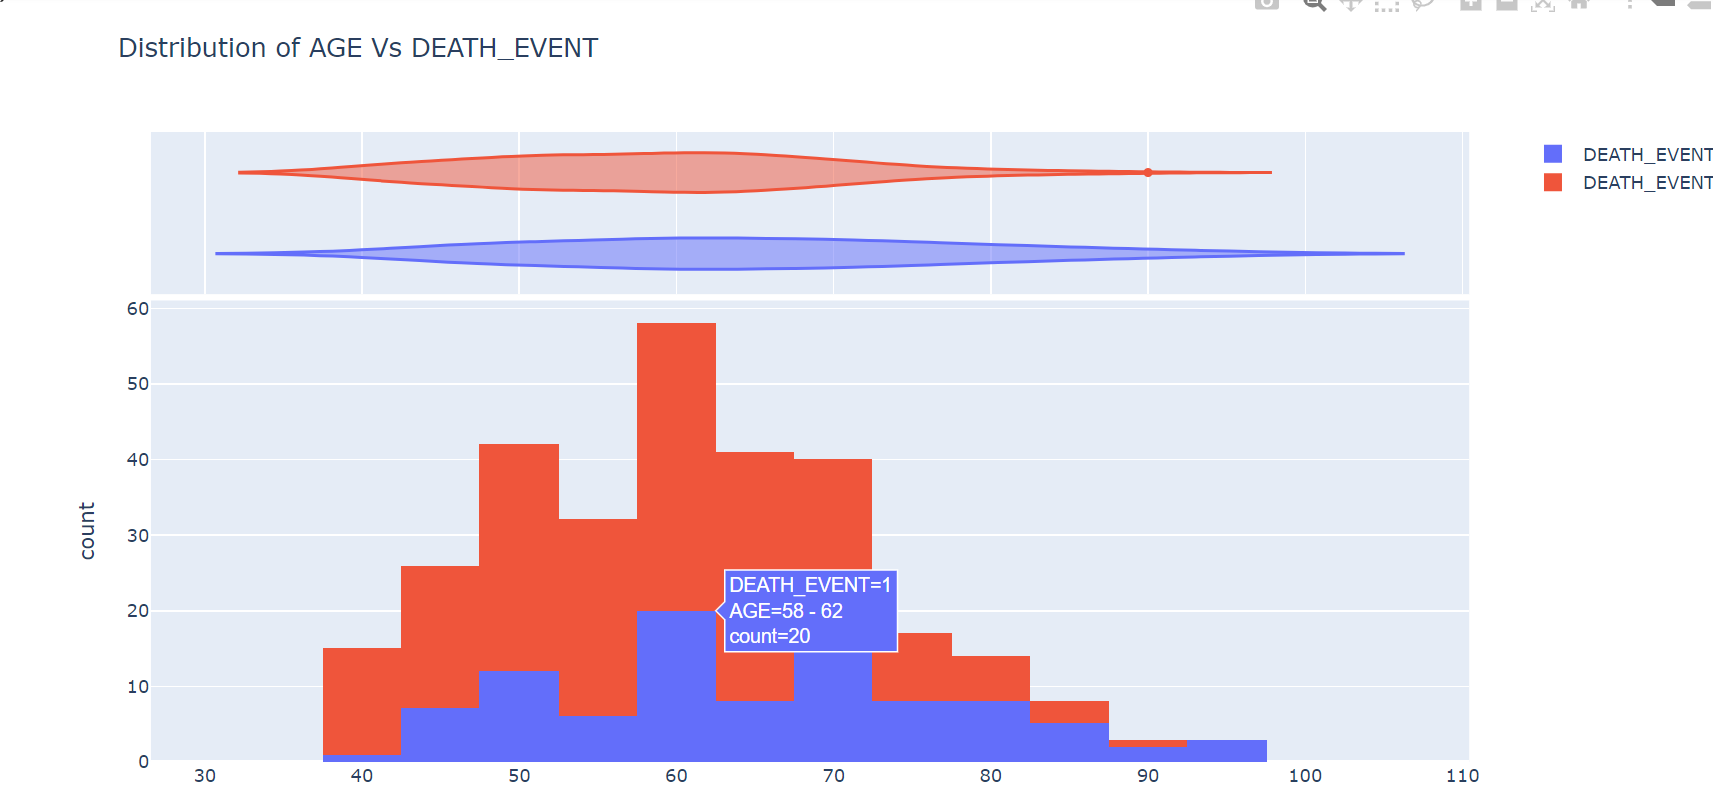

**Pie chart for Sex:**

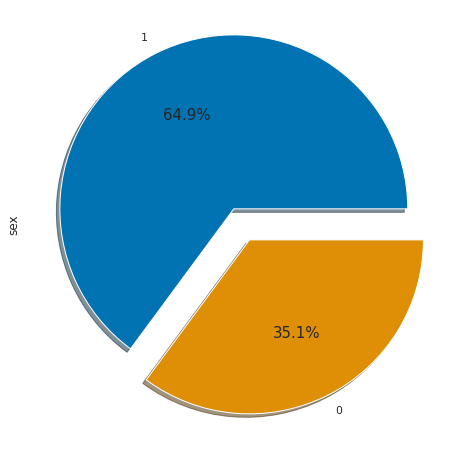

In [ ]:
train.sex.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)

**male-64.9%**

**female-35.1%**

**Countplot of sex wrt Death event:** 

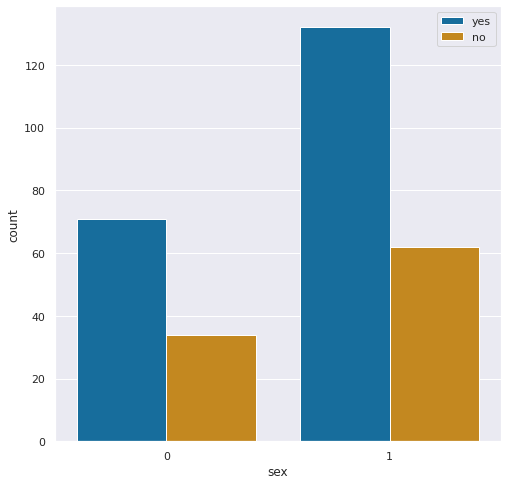

In [ ]:
sns.countplot(x='sex',hue='DEATH_EVENT',data=train)
plt.legend(['yes','no'])

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = train[(train["DEATH_EVENT"]==0) & (train["sex"]==1)]
d2 = train[(train["DEATH_EVENT"]==1) & (train["sex"]==1)]
d3 = train[(train["DEATH_EVENT"]==0) & (train["sex"]==0)]
d4 = train[(train["DEATH_EVENT"]==1) & (train["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]

values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

**Barplot of sex Vs smoking:**

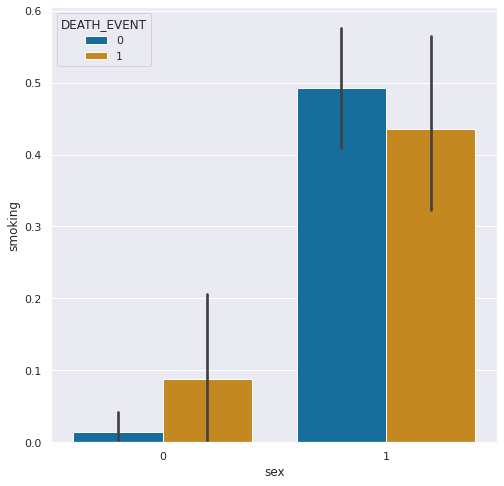

In [ ]:
sns.barplot(x='sex',y='smoking',hue='DEATH_EVENT',data=train);

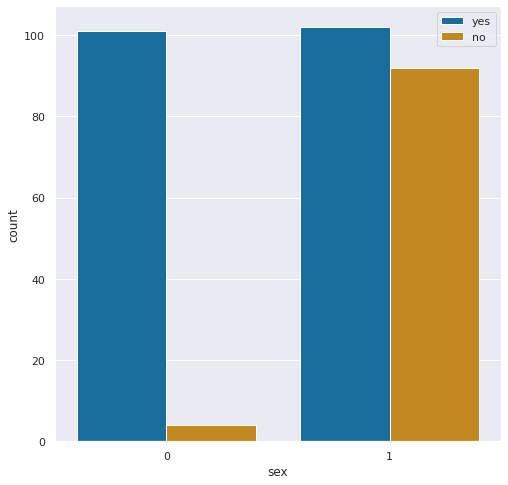

In [ ]:
sns.countplot(x='sex',hue='smoking',data=train)
plt.legend(['yes','no']);

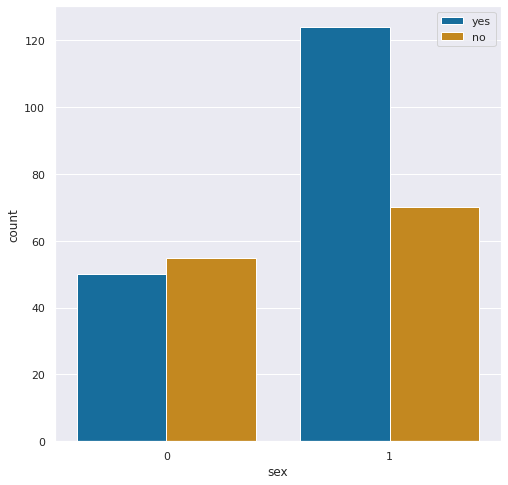

In [ ]:
sns.countplot(x='sex',hue='diabetes',data=train)
plt.legend(['yes','no']);

**Diabetic:**

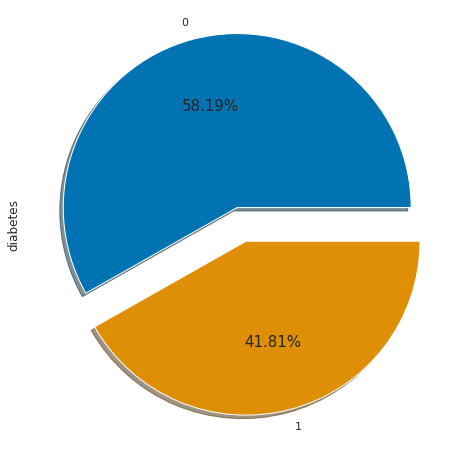

In [ ]:
train.diabetes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%2.2f%%',shadow=True)

**Inference:**

**58.19% female are diabetic**

**41.81% male are diabetic**

**Diabetic wrt Death event:**

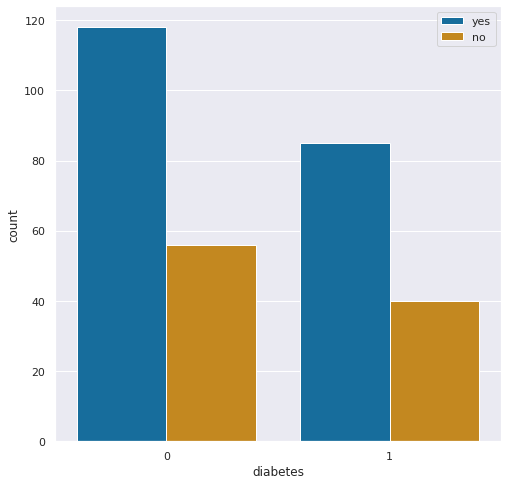

In [ ]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=train)
plt.legend(['yes','no']);

**Boxplot of ejection_fraction:**

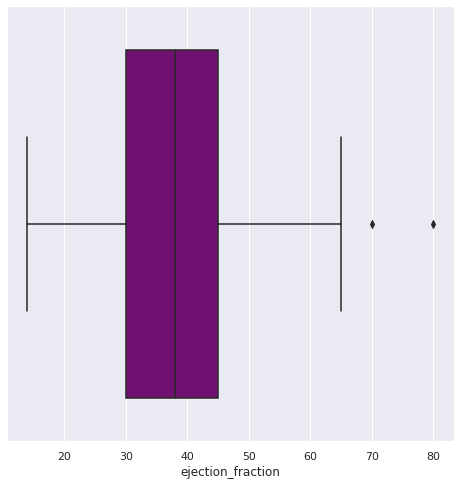

In [ ]:
sns.boxplot(x = train.ejection_fraction, color = 'purple')
plt.show()


**There are two outliers. Lets remove them (70 and 80)**

In [ ]:
train[train['ejection_fraction']>=70]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
64   45.0        0                       582         0                 80   
217  54.0        1                       427         0                 70   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
64                     0  263358.03              1.18           137    0   
217                    1  151000.00              9.00           137    0   

     smoking  time  DEATH_EVENT  
64         0    63            0  
217        0   196            1

In [ ]:
train = train[train['ejection_fraction']<70]

**EJECTION FRACTION DISTRIBUTION INTERACTIVE PLOT:**

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates

    template = 'plotly'
)

fig.show()

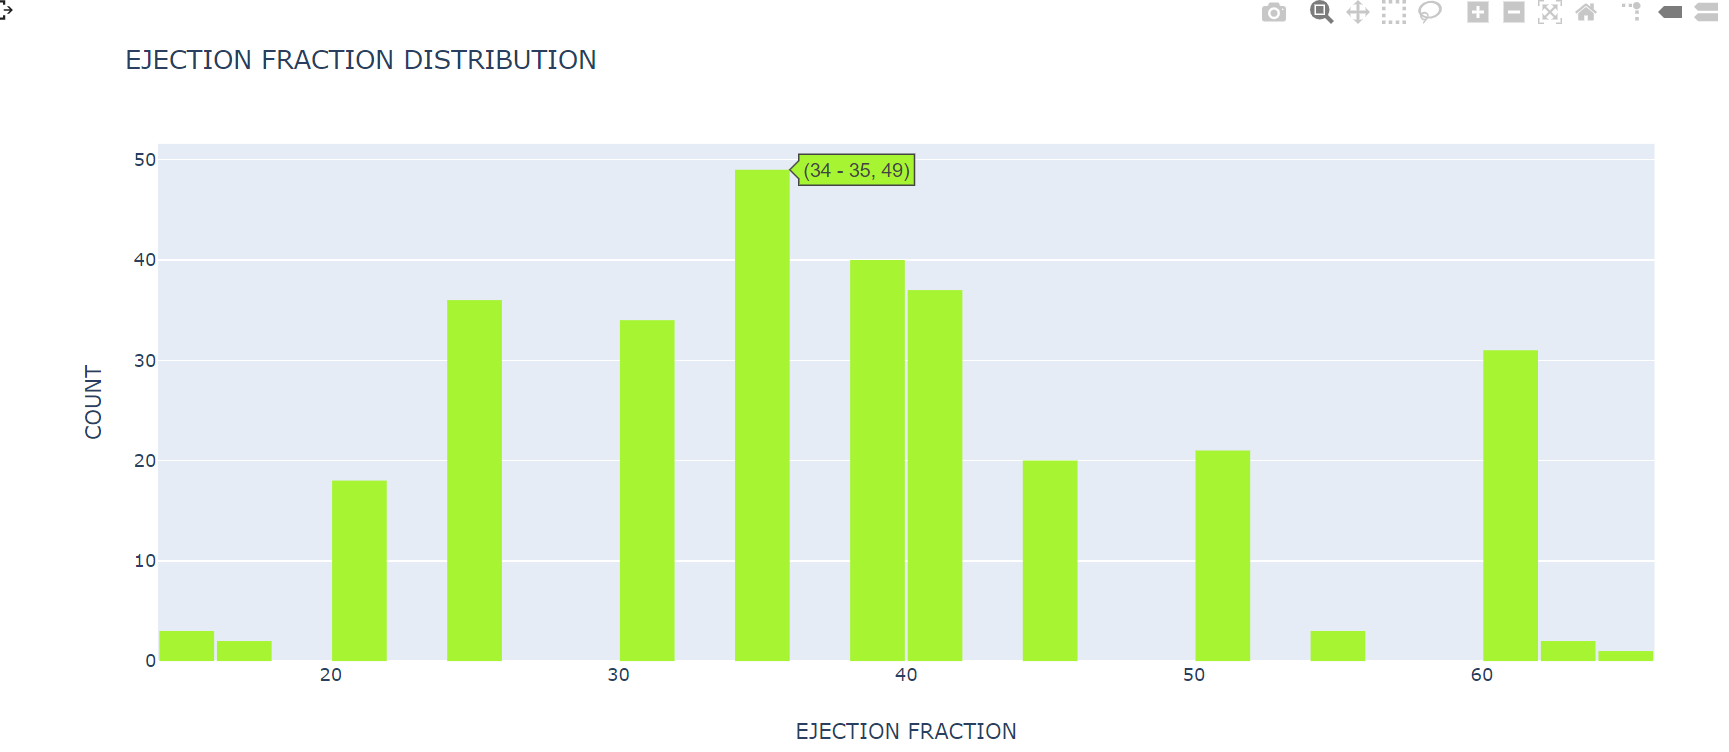

**Line plot: Death event vs Age**

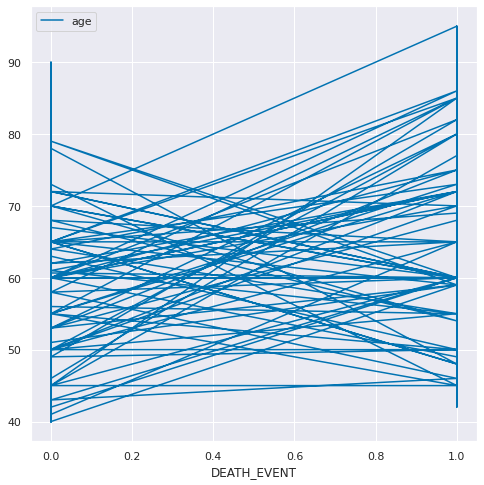

In [ ]:
df.plot(x='DEATH_EVENT',y='age')

**Area plot: Death event vs age**

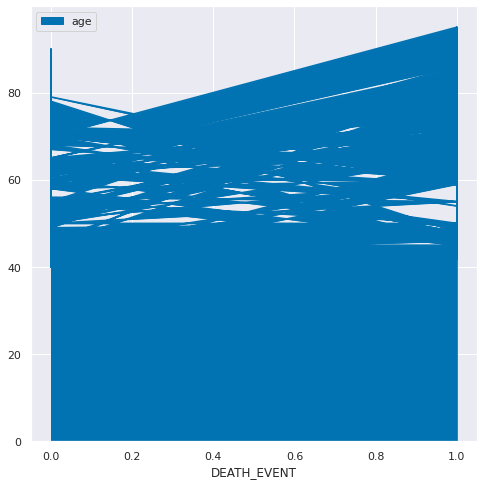

In [ ]:
df.plot.area(x='DEATH_EVENT',y='age')

**Bar plot of Death event vs Age:**

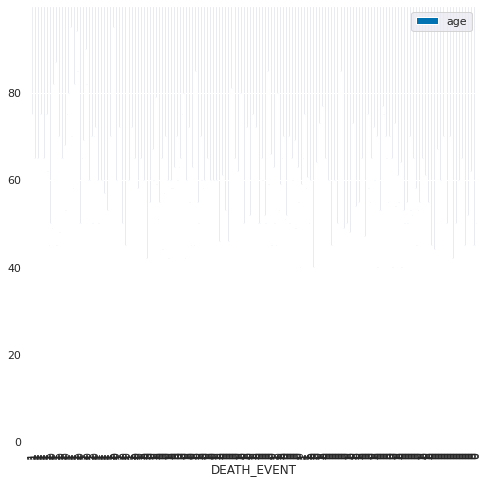

In [ ]:
df.plot.bar(x='DEATH_EVENT',y='age')

**Boxplot of Death event:**

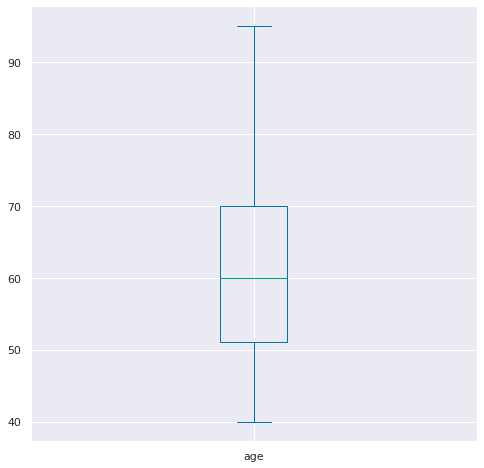

In [ ]:
df.plot.box(x='DEATH_EVENT',y='age')

**Density plot of Death event:**

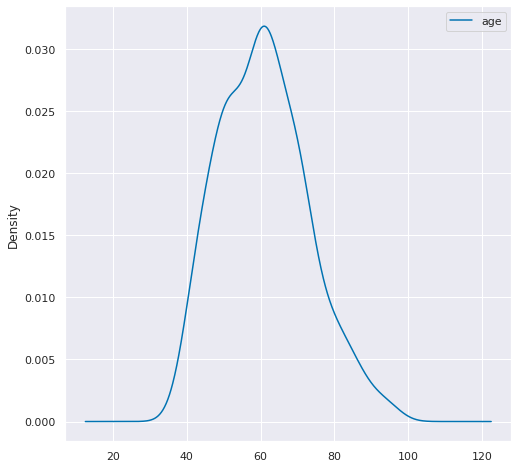

In [ ]:
df.plot.density(x='DEATH_EVENT',y='age')

**Interactive histogram for Death event:**

In [ ]:
#histogram
import plotly.express as px
df
fig = px.histogram(df, x="DEATH_EVENT", y="age", color="sex", marginal="rug",hover_data=df.columns,title="Histogram for Death Event")
fig.show()

**Scatter plot for Death Event:**

In [ ]:
#scatterplot
fig = px.scatter(x=[0.5, 1], y=[12000, 4500],title="Scatter plot for Death Event")
fig.show()

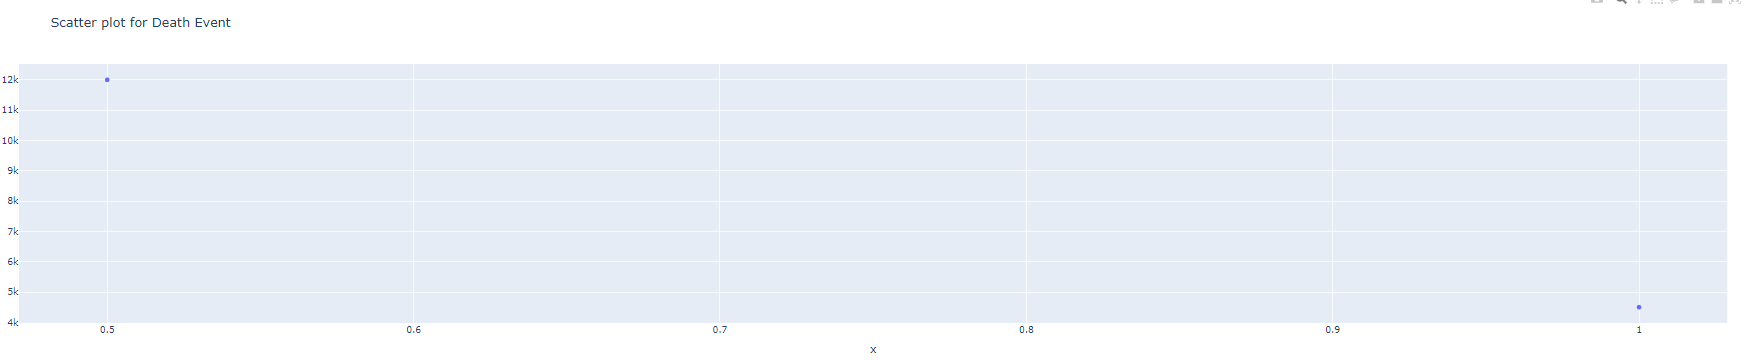

**Interactive Piechart for Death Event:**

In [ ]:
#piechart
fig = px.pie(df, values='DEATH_EVENT', names='sex',color="sex",title="Piechart for Death Event")
fig.show()

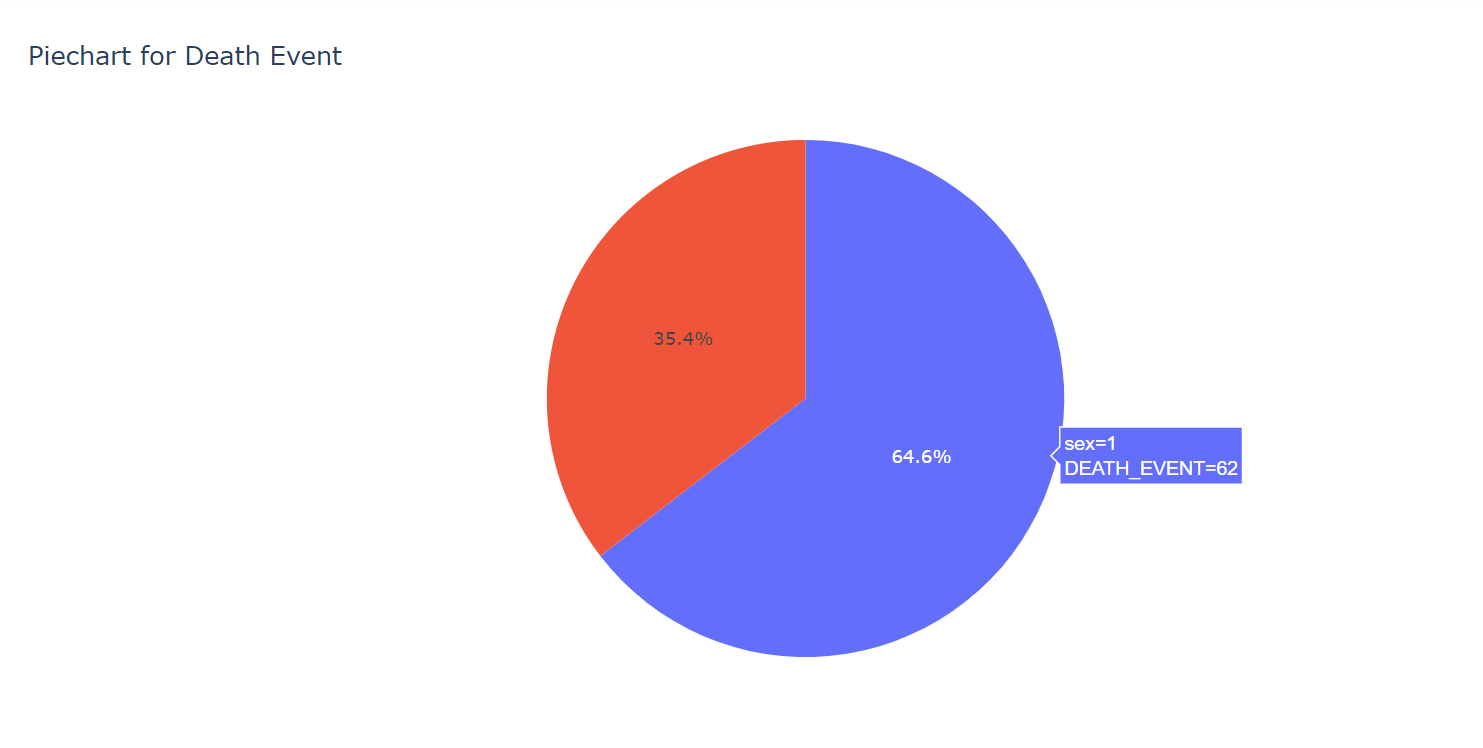

**Bubble chart:**

In [ ]:
#bubble chart
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter(x=[0.5, 1], y=[12000, 4500],mode='markers',marker_size=[40, 60, 80, 100])])
fig.show()

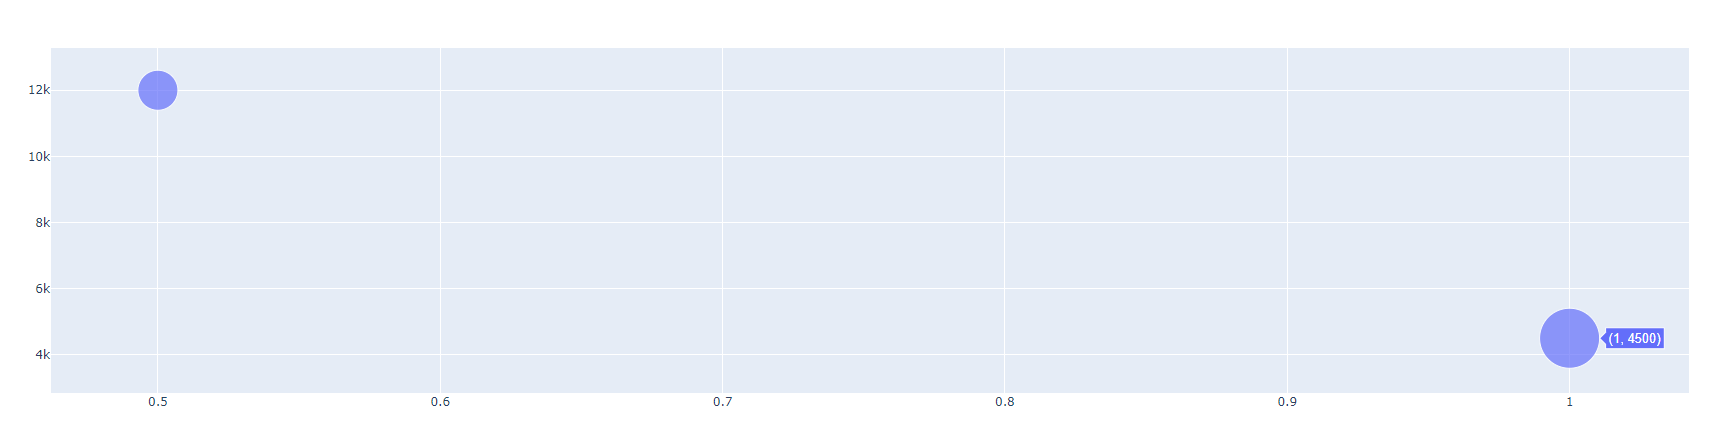

**Scatter plot Death event vs Age:**

In [ ]:
fig = px.scatter(df, x='DEATH_EVENT', y='age', opacity=0.65,trendline='ols', trendline_color_override='darkblue')
fig.show()

**Line plot Death event vs  Age:**

In [ ]:
fig = px.line(df, x = 'DEATH_EVENT', y = 'age', title='Heart failure-Death Event')
fig.show()

**Selecting important features:**

In [ ]:
x=df[b]
x.drop("time",axis=1,inplace=True)
y=df['DEATH_EVENT']

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Data Standardization:**

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

In [ ]:
Scaler.fit(x)

StandardScaler()

In [ ]:
scaled_features=Scaler.transform(x)

In [ ]:
scaled_features

array([[ 1.68164843e-02,  1.65728387e-04, -1.53055953e+00, ...,
         1.35927151e+00, -8.71104775e-01, -6.87681906e-01],
       [ 7.53566018e-09,  7.51463953e+00, -7.07675018e-03, ...,
        -7.35688190e-01, -8.71104775e-01, -6.87681906e-01],
       [-1.03807313e+00, -4.49938761e-01, -1.53055953e+00, ...,
        -7.35688190e-01, -8.71104775e-01,  1.45416070e+00],
       ...,
       [ 4.90208200e+00,  1.52597865e+00,  1.85495776e+00, ...,
        -7.35688190e-01, -8.71104775e-01, -6.87681906e-01],
       [-1.26338936e+00,  1.89039811e+00, -7.07675018e-03, ...,
        -7.35688190e-01, -8.71104775e-01,  1.45416070e+00],
       [ 1.34823057e+00, -3.98321274e-01,  5.85388775e-01, ...,
        -7.35688190e-01, -8.71104775e-01,  1.45416070e+00]])

In [ ]:
db=df[b].copy()
db.drop("time",axis=1,inplace=True)
db

platelets  creatinine_phosphokinase  ejection_fraction   age  \
0    265000.00                       582                 20  75.0   
1    263358.03                      7861                 38  55.0   
2    162000.00                       146                 20  65.0   
3    210000.00                       111                 20  50.0   
4    327000.00                       160                 20  65.0   
..         ...                       ...                ...   ...   
294  155000.00                        61                 38  62.0   
295  270000.00                      1820                 38  55.0   
296  742000.00                      2060                 60  45.0   
297  140000.00                      2413                 38  45.0   
298  395000.00                       196                 45  50.0   

     serum_creatinine  serum_sodium  high_blood_pressure  anaemia  smoking  
0                 1.9           130                    1        0        0  
1                 1.1           136                    0        0        0  
2                 1.3           129                    0        0        1  
3                 1.9           137                    0        1        0  
4                 2.7           116                    0        1        0  
..                ...           ...                  ...      ...      ...  
294               1.1           143                    1        0        1  
295               1.2           139                    0        0        0  
296               0.8           138                    0        0        0  
297               1.4           140                    0        0        1  
298               1.6           136                    0        0        1  

[299 rows x 9 columns]

In [ ]:
df_feat=pd.DataFrame(scaled_features,columns=db.columns)

In [ ]:
df_feat

platelets  creatinine_phosphokinase  ejection_fraction       age  \
0    1.681648e-02                  0.000166          -1.530560  1.192945   
1    7.535660e-09                  7.514640          -0.007077 -0.491279   
2   -1.038073e+00                 -0.449939          -1.530560  0.350833   
3   -5.464741e-01                 -0.486071          -1.530560 -0.912335   
4    6.517986e-01                 -0.435486          -1.530560  0.350833   
..            ...                       ...                ...       ...   
294 -1.109765e+00                 -0.537688          -0.007077  0.098199   
295  6.802472e-02                  1.278215          -0.007077 -0.491279   
296  4.902082e+00                  1.525979           1.854958 -1.333392   
297 -1.263389e+00                  1.890398          -0.007077 -1.333392   
298  1.348231e+00                 -0.398321           0.585389 -0.912335   

     serum_creatinine  serum_sodium  high_blood_pressure   anaemia   smoking  
0            0.490057     -1.504036             1.359272 -0.871105 -0.687682  
1           -0.284552     -0.141976            -0.735688 -0.871105 -0.687682  
2           -0.090900     -1.731046            -0.735688 -0.871105  1.454161  
3            0.490057      0.085034            -0.735688  1.147968 -0.687682  
4            1.264666     -4.682176            -0.735688  1.147968 -0.687682  
..                ...           ...                  ...       ...       ...  
294         -0.284552      1.447094             1.359272 -0.871105  1.454161  
295         -0.187726      0.539054            -0.735688 -0.871105 -0.687682  
296         -0.575031      0.312044            -0.735688 -0.871105 -0.687682  
297          0.005926      0.766064            -0.735688 -0.871105  1.454161  
298          0.199578     -0.141976            -0.735688 -0.871105  1.454161  

[299 rows x 9 columns]

In [ ]:
df_feat.describe()

platelets  creatinine_phosphokinase  ejection_fraction  \
count  2.990000e+02                299.000000       2.990000e+02   
mean   7.723291e-17                  0.000000      -3.267546e-17   
std    1.001676e+00                  1.001676       1.001676e+00   
min   -2.440155e+00                 -0.576918      -2.038387e+00   
25%   -5.208700e-01                 -0.480393      -6.841802e-01   
50%   -1.390846e-02                 -0.342574      -7.076750e-03   
75%    4.111199e-01                  0.000166       5.853888e-01   
max    6.008180e+00                  7.514640       3.547716e+00   

                age  serum_creatinine  serum_sodium  high_blood_pressure  \
count  2.990000e+02      2.990000e+02  2.990000e+02           299.000000   
mean   5.703353e-16      1.425838e-16 -8.673849e-16             0.000000   
std    1.001676e+00      1.001676e+00  1.001676e+00             1.001676   
min   -1.754448e+00     -8.655094e-01 -5.363206e+00            -0.735688   
25%   -8.281242e-01     -4.782047e-01 -5.959961e-01            -0.735688   
50%   -7.022315e-02     -2.845524e-01  8.503384e-02            -0.735688   
75%    7.718891e-01      5.926150e-03  7.660638e-01             1.359272   
max    2.877170e+00      7.752020e+00  2.582144e+00             1.359272   

            anaemia       smoking  
count  2.990000e+02  2.990000e+02  
mean   1.009969e-16 -1.188199e-17  
std    1.001676e+00  1.001676e+00  
min   -8.711048e-01 -6.876819e-01  
25%   -8.711048e-01 -6.876819e-01  
50%   -8.711048e-01 -6.876819e-01  
75%    1.147968e+00  1.454161e+00  
max    1.147968e+00  1.454161e+00

**After standardization we see that mean is 0 and std deviation is 1**

In [ ]:
X=df_feat

**Splitting the data:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [ ]:
X_train.shape

(239, 9)

In [ ]:
Y_train.shape

(239,)

In [ ]:
X_test.shape

(60, 9)

In [ ]:
Y_test.shape

(60,)

**SMOTE:**

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input.

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, Y_train = sm.fit_resample(X_train, Y_train.ravel())
print("After OverSampling, counts of label '1': {}".format(sum(Y_train== 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train== 0)))

Before OverSampling, counts of label '1': 75
Before OverSampling, counts of label '0': 164 

After OverSampling, counts of label '1': 164
After OverSampling, counts of label '0': 164


For balanced data mean should be 0.5

We see that in the trained dataset the number of sample for all the categories are balanced.

#**LogisticRegression:**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [ ]:
log_model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
training_prediction=log_model.predict(X_train)

In [ ]:
testing_prediction=log_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(Y_test,testing_prediction))

0.7


**acuracy is 0.7**

In [ ]:
#Performance analysis for training data
print(classification_report(Y_train,training_prediction))
#Performance analysis for test data
print(classification_report(Y_test,testing_prediction))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       164
           1       0.78      0.81      0.79       164

    accuracy                           0.79       328
   macro avg       0.79      0.79      0.79       328
weighted avg       0.79      0.79      0.79       328

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        39
           1       0.57      0.62      0.59        21

    accuracy                           0.70        60
   macro avg       0.67      0.68      0.68        60
weighted avg       0.71      0.70      0.70        60



In [ ]:
#Performance analysis for test data
print(confusion_matrix(Y_train,training_prediction))
#Performance analysis for test data
print(confusion_matrix(Y_test,testing_prediction))

[[126  38]
 [ 31 133]]
[[29 10]
 [ 8 13]]


#**KNN:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=Y_test))

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

Text(0, 0.5, 'Error Rate')

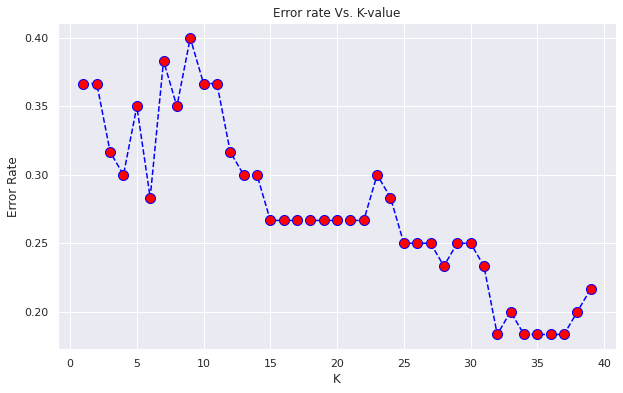

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate Vs. K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

**32 has the lowest error rate**

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=32)
knn_model.fit(X_train,Y_train)
pred=knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(Y_test,pred))

0.8166666666666667


**Accuracy is 0.816**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,pred))
print(confusion_matrix(Y_test,pred))


              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.75      0.71      0.73        21

    accuracy                           0.82        60
   macro avg       0.80      0.79      0.80        60
weighted avg       0.81      0.82      0.82        60

[[34  5]
 [ 6 15]]


#**Decision tree:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,Y_train)
pred_tree=clf.predict(X_test)

In [ ]:
print(accuracy_score(Y_test,pred_tree))

0.6833333333333333


**Accuracy is 0.68**

In [ ]:
print(classification_report(Y_test,pred_tree))
print(confusion_matrix(Y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        39
           1       0.54      0.62      0.58        21

    accuracy                           0.68        60
   macro avg       0.66      0.67      0.66        60
weighted avg       0.70      0.68      0.69        60

[[28 11]
 [ 8 13]]


[Text(136.303125, 209.07692307692307, 'ejection_fraction <= -0.708\ngini = 0.5\nsamples = 328\nvalue = [164, 164]'),
 Text(27.900000000000002, 192.35076923076923, 'creatinine_phosphokinase <= -0.531\ngini = 0.253\nsamples = 101\nvalue = [15, 86]'),
 Text(12.4, 175.62461538461537, 'ejection_fraction <= -1.319\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(6.2, 158.89846153846153, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(18.6, 158.89846153846153, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(43.4, 175.62461538461537, 'serum_creatinine <= -0.527\ngini = 0.217\nsamples = 97\nvalue = [12, 85]'),
 Text(31.0, 158.89846153846153, 'serum_sodium <= -1.391\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(24.8, 142.1723076923077, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(37.2, 142.1723076923077, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(55.800000000000004, 158.89846153846153, 'serum_sodium <= 1.475\ngini = 0.19\nsamples = 94\nvalue = [10, 84]'),
 Text(49.6, 142

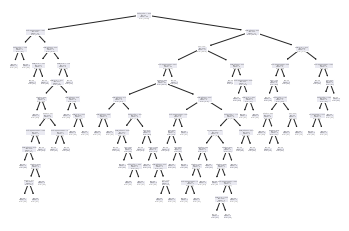

In [ ]:
from sklearn import tree
tree.plot_tree(clf,feature_names=X_train.columns)

#DECISION TREE GRAPH:

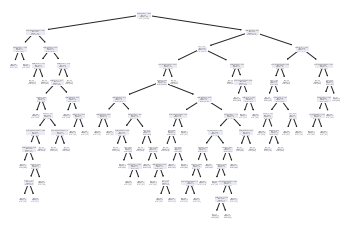

**Q.NO.3:A**

Apply AutoML concept on the dataset based on the research problem and provide
the leaderboard of the best algorithms with accuracy score.

In [ ]:
#!pip install auto-sklearn

In [ ]:
from autosklearn.classification import AutoSklearnClassifier

In [ ]:
model=AutoSklearnClassifier(time_left_for_this_task=2*60,per_run_time_limit=10)

In [ ]:
Y_train

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
model.fit(X_train,Y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=10, time_left_for_this_task=120)

In [ ]:
print(model.sprint_statistics)

<bound method AutoSklearnEstimator.sprint_statistics of AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=10, time_left_for_this_task=120)>


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred))


0.7666666666666667


**Accuracy is 0.76**

In [ ]:
model.get_params()

{'allow_string_features': True,
 'dask_client': None,
 'dataset_compression': True,
 'delete_tmp_folder_after_terminate': True,
 'disable_evaluator_output': False,
 'ensemble_class': autosklearn.ensembles.ensemble_selection.EnsembleSelection,
 'ensemble_kwargs': None,
 'ensemble_nbest': 50,
 'ensemble_size': None,
 'exclude': None,
 'get_smac_object_callback': None,
 'get_trials_callback': None,
 'include': None,
 'initial_configurations_via_metalearning': 25,
 'load_models': True,
 'logging_config': None,
 'max_models_on_disc': 50,
 'memory_limit': 3072,
 'metadata_directory': None,
 'metric': None,
 'n_jobs': None,
 'per_run_time_limit': 10,
 'resampling_strategy': 'holdout',
 'resampling_strategy_arguments': None,
 'scoring_functions': None,
 'seed': 1,
 'smac_scenario_args': None,
 'time_left_for_this_task': 120,
 'tmp_folder': None}

In [ ]:
!pip install PipelineProfiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.1/881.1 KB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.0 MB/s eta 0:00:00


In [ ]:
import PipelineProfiler
profiler_data =PipelineProfiler.import_autosklearn(model)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

**extra_trees model has highest accuracy of 0.844**

In [ ]:
print(model.leaderboard())

          rank  ensemble_weight                 type      cost  duration
model_id                                                                
22           1             0.30          extra_trees  0.155963  1.486121
33           2             0.02          extra_trees  0.155963  1.739371
6            3             0.06                  mlp  0.174312  5.570466
32           4             0.02          extra_trees  0.174312  1.418055
4            5             0.02                  mlp  0.192661  3.267963
23           6             0.06  k_nearest_neighbors  0.192661  0.896085
16           7             0.02        random_forest  0.220183  1.696986
18           8             0.04    gradient_boosting  0.220183  1.239305
30           9             0.16                  mlp  0.229358  1.304907
20          10             0.08             adaboost  0.238532  1.569473
11          11             0.02             adaboost  0.247706  3.704560
15          12             0.02        random_fores

#**KNN model provides the highest accuracy of 81.66 so we save this model.**

In [ ]:
import pickle
filename='final_model_knn.sav'
pickle.dump(knn_model,open(filename,'wb'))#write binary

In [ ]:
loaded_model=pickle.load(open('final_model_knn.sav','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.8166666666666667


**3)B.** 

Perform the following mathematical operations using tensorflow.
i) Addition
ii) Subtraction
iii) Mutliplication

In [ ]:
import tensorflow as tf

In [ ]:
with tf.compat.v1.Session() as sess:
    a=tf.constant(11.0)
    b=tf.constant(12.0)
    c=tf.multiply(a,b)
    mul=sess.run(c)
    d=tf.add(a,b)
    add=sess.run(d)
    s=tf.subtract(a,b)
    sub=sess.run(s)
    print("Multiplication:",mul)
    print("Addition:",add)
    print("Subtraction:",sub)

Multiplication: 132.0
Addition: 23.0
Subtraction: -1.0
